In [5]:
!pip install psaw
import re
import pandas as pd
import datetime as dt
from psaw import PushshiftAPI

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

api = PushshiftAPI()

### **Getting Reddit data**


In [0]:
gen = api.search_comments(after=int(dt.datetime(2019, 10, 1).timestamp()),
                             before = int(dt.datetime(2019, 11, 30).timestamp()),
                             q = "Fitbit",
                             limit = 10000)


df_fitbit = pd.DataFrame([obj.d_ for obj in gen])

In [7]:
df_fitbit.shape

(9063, 36)

In [0]:
## Adding a filter for comentions with Google, Apple, Samsung, Garmin

df_fitbit['google_mention'] = df_fitbit['body'].str.contains('google', flags=re.IGNORECASE, regex=True)
df_fitbit['apple_mention'] = df_fitbit['body'].str.contains('apple|iwatch', flags=re.IGNORECASE, regex=True)
df_fitbit['samsung_mention'] = df_fitbit['body'].str.contains('samsung', flags=re.IGNORECASE, regex=True)
df_fitbit['garmin_mention'] = df_fitbit['body'].str.contains('garmin', flags=re.IGNORECASE, regex=True)


In [0]:
## Adding the date column

df_fitbit['date'] = pd.to_datetime(df_fitbit['created_utc'],unit='s')
df_fitbit['date'] = df_fitbit['date'].dt.date

In [10]:
df_cleaned = df_fitbit[['date','author','body','subreddit','google_mention','apple_mention','samsung_mention','garmin_mention']]
df_cleaned.head(5)

,date,author,body,subreddit,google_mention,apple_mention,samsung_mention,garmin_mention
0,2019-11-24,AvoCAToWithTomato,This screencap actually makes absolute sense. ...,Amberlynn,False,False,False,False
1,2019-11-24,Bag-of-nails,I never got a warning but also noticed that ye...,PokemonGoSpoofing,True,False,False,False
2,2019-11-24,BigTuna177,I can’t find anything called a Fitbit C but I ...,HomeDepot,False,False,False,False
3,2019-11-24,Misrabelle,MY FITBIT THINKS I'M RUNNING,DallasStars,False,False,False,False
4,2019-11-24,lorreli14,I had a fitbit for a while. They have a terri...,Amberlynn,False,False,False,False


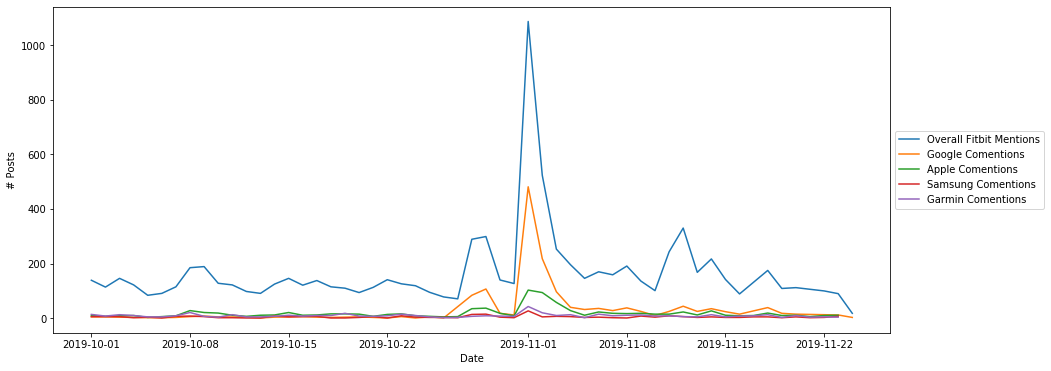

In [11]:
### Trend of comentions between Fitbit and other brands

plt.figure(figsize=(15,6))
plt.plot(df_cleaned.groupby('date')['subreddit'].agg('count'), label = 'Overall Fitbit Mentions')
plt.plot(df_cleaned[df_cleaned['google_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Google Comentions' )
plt.plot(df_cleaned[df_cleaned['apple_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Apple Comentions' )
plt.plot(df_cleaned[df_cleaned['samsung_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Samsung Comentions' )
plt.plot(df_cleaned[df_cleaned['garmin_mention'] == True].groupby('date')['subreddit'].agg('count'),label = 'Garmin Comentions' )
plt.xlabel('Date')
plt.ylabel('# Posts')
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.show()


### **Getting Twitter Data** 

In [12]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [13]:
df_tweets = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/All_tweets_data.csv')
df_tweets['text'] = df_tweets['text'].fillna('NA')
df_tweets.shape


(89007, 23)

In [14]:
df_tweets_cleaned = df_tweets[['likes','retweets','text','timestamp','date']]
df_tweets_cleaned.shape

(89007, 5)

In [15]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27


In [0]:
from datetime import datetime,date

def getdate(d):
  if type(d) == str:
    dt = d.split('-')
    return datetime(int(dt[0]), int(dt[1]),int(dt[2])).date()
  else:
    return d

df_tweets_cleaned['date'] = df_tweets_cleaned['date'].map(getdate)

In [17]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27


In [0]:
## Adding a filter for comentions with Google, Apple, Samsung, Garmin

df_tweets_cleaned['google_mention'] = df_tweets_cleaned['text'].str.contains('google', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['apple_mention'] = df_tweets_cleaned['text'].str.contains('apple|iwatch', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['samsung_mention'] = df_tweets_cleaned['text'].str.contains('samsung', flags=re.IGNORECASE, regex=True)
df_tweets_cleaned['garmin_mention'] = df_tweets_cleaned['text'].str.contains('garmin', flags=re.IGNORECASE, regex=True)



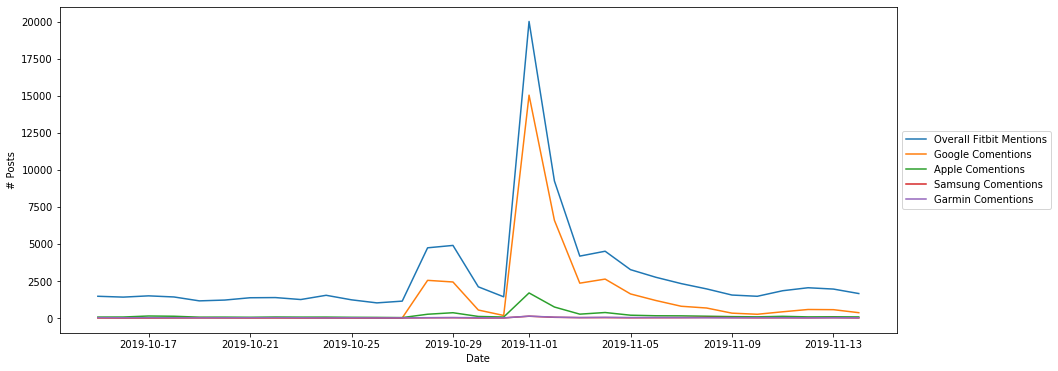

In [19]:
### Trend of comentions between Fitbit and other brands

plt.figure(figsize=(15,6))
plt.plot(df_tweets_cleaned.groupby('date')['text'].agg('count'), label = 'Overall Fitbit Mentions')
plt.plot(df_tweets_cleaned[df_tweets_cleaned['google_mention'] == True].groupby('date')['text'].agg('count'),label = 'Google Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['apple_mention'] == True].groupby('date')['text'].agg('count'),label = 'Apple Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['samsung_mention'] == True].groupby('date')['text'].agg('count'),label = 'Samsung Comentions' )
plt.plot(df_tweets_cleaned[df_tweets_cleaned['garmin_mention'] == True].groupby('date')['text'].agg('count'),label = 'Garmin Comentions' )
plt.xlabel('Date')
plt.ylabel('# Posts')
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.show()


### **Combining both the Twitter and Reddit data**

In [20]:
df_cleaned.head(5)

,date,author,body,subreddit,google_mention,apple_mention,samsung_mention,garmin_mention
0,2019-11-24,AvoCAToWithTomato,This screencap actually makes absolute sense. ...,Amberlynn,False,False,False,False
1,2019-11-24,Bag-of-nails,I never got a warning but also noticed that ye...,PokemonGoSpoofing,True,False,False,False
2,2019-11-24,BigTuna177,I can’t find anything called a Fitbit C but I ...,HomeDepot,False,False,False,False
3,2019-11-24,Misrabelle,MY FITBIT THINKS I'M RUNNING,DallasStars,False,False,False,False
4,2019-11-24,lorreli14,I had a fitbit for a while. They have a terri...,Amberlynn,False,False,False,False


In [21]:
df_tweets_cleaned.head(5)

,likes,retweets,text,timestamp,date,google_mention,apple_mention,samsung_mention,garmin_mention
0,0.0,0.0,"Fitbit Versa Smart Watch - ""Special Edition"" -...",2019-10-27 23:58:38,2019-10-27,False,False,False,False
1,0.0,0.0,How did you do that? Do they have food diaries...,2019-10-27 23:58:20,2019-10-27,False,False,False,False
2,3.0,0.0,BUZZIN to set up my Fitbit and google everythi...,2019-10-27 23:55:38,2019-10-27,True,False,False,False
3,0.0,0.0,#fitbit #googlefit Top Weekly Games:,2019-10-27 23:55:06,2019-10-27,True,False,False,False
4,0.0,0.0,I earned a Fitbit Adjustment of 40 calories. #...,2019-10-27 23:54:14,2019-10-27,False,False,False,False


In [22]:
df_main1 = df_cleaned[['date','body','google_mention','apple_mention','samsung_mention','garmin_mention']]
print(df_main1.shape)

df_main2 = df_tweets_cleaned[['date','text','google_mention','apple_mention','samsung_mention','garmin_mention']]
df_main2 = df_main2.rename(columns={"text": "body"})
print(df_main2.shape)

(9063, 6)
(89007, 6)


In [23]:
df_main = pd.concat([df_main1, df_main2], axis=0, sort=False)
df_main = df_main.reset_index()
df_main = df_main.drop(columns="index")
df_main.shape

(98070, 6)

In [0]:
## Adding a flag for dates

def dateflag(d):
  if type(d) == float:
    return 0
  else:

    if d >= datetime(2019,10,28).date():
      return 1
    else:
      return 0

df_main['after_news'] = df_main['date'].map(dateflag) 

In [25]:
## Cleaning the text
# https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

import spacy
import nltk
import string
from spacy.lang.en import English
nlp = English()
nltk.download('punkt')
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


def getclean(s):
  try:
    s = s.lower()

    
    ## tokenization
    s = nlp(s)
    token_list = []
    for token in s:
      token_list.append(token.text)
    
    updated_s = []
    for w in token_list:
      w = w.lstrip().rstrip()
      updated_s.append(w)

    ## removing bad characters
    new_list = []
    for w in updated_s:
      if '\n' in w or '\xa0' in w or '..' in w or '!' in w or '。' in w or "  " in w or "“" in w or "…" in w :
        continue
      else:
        new_list.append(w)
    
    ## removing numbers
    non_numbers = []
    for w in new_list:
      try:
        float(w)
      except:
        non_numbers.append(w)


    ## removing stopwords
    filtered_words=[]
    for word in non_numbers:
      if word in spacy_stopwords:
        continue
      else:
          filtered_words.append(word)

    ## lemmatization
    doc = nlp(' '.join(filtered_words))
    lemmatized = []
    for word in doc:
      lemmatized.append(word.lemma_)
    

    ## removing punctuations
    final_list =  []
    for w in lemmatized:
      w_clean = w.translate(str.maketrans('', '',string.punctuation))
      if len(w_clean) >=3:
        final_list.append(w_clean)
    
    return final_list
  
  except:
    return s


df_main['cleaned_text'] = df_main['body'].map(getclean)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
df_main.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text
0,2019-11-24,This screencap actually makes absolute sense. ...,False,False,False,False,1,"[screencap, actually, make, absolute, sense, r..."
1,2019-11-24,I never got a warning but also noticed that ye...,True,False,False,False,1,"[get, warn, notice, yesterday, defit, work, fi..."
2,2019-11-24,I can’t find anything called a Fitbit C but I ...,False,False,False,False,1,"[find, call, fitbit, want, watch, track, locat..."
3,2019-11-24,MY FITBIT THINKS I'M RUNNING,False,False,False,False,1,"[fitbit, think, run]"
4,2019-11-24,I had a fitbit for a while. They have a terri...,False,False,False,False,1,"[fitbit, terrible, habit, log, step, move, log..."


### **Word Clouds**

https://www.datacamp.com/community/tutorials/wordcloud-python

In [0]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
def getstr(l):
  try:
    return ' '.join(l)
  except:
    return l

df_main['cleaned_string'] = df_main['cleaned_text'].map(getstr)
df_main.head(5)

,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text,cleaned_string
0,2019-11-24,This screencap actually makes absolute sense. ...,False,False,False,False,1,"[screencap, actually, make, absolute, sense, r...",screencap actually make absolute sense referen...
1,2019-11-24,I never got a warning but also noticed that ye...,True,False,False,False,1,"[get, warn, notice, yesterday, defit, work, fi...",get warn notice yesterday defit work fine hatc...
2,2019-11-24,I can’t find anything called a Fitbit C but I ...,False,False,False,False,1,"[find, call, fitbit, want, watch, track, locat...",find call fitbit want watch track location lik...
3,2019-11-24,MY FITBIT THINKS I'M RUNNING,False,False,False,False,1,"[fitbit, think, run]",fitbit think run
4,2019-11-24,I had a fitbit for a while. They have a terri...,False,False,False,False,1,"[fitbit, terrible, habit, log, step, move, log...",fitbit terrible habit log step move log drive


In [0]:
## Before the acquisition was announced

text_before_news = df_main[df_main['after_news'] == 0]['cleaned_string'].sum()


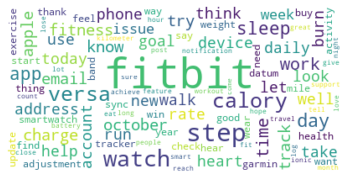

In [133]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=False).generate(text_before_news)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [134]:
wordcloud.to_file("/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/before_news_wordcloud.png")

In [0]:
## After the acquisition was announced

text_after_news = df_main[df_main['after_news'] == 1]['cleaned_string'].sum()


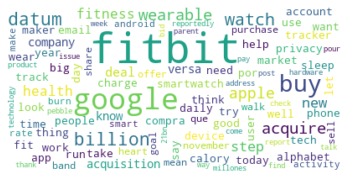

In [136]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations=False).generate(text_after_news)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [138]:
wordcloud.to_file("/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/after_news_wordcloud.png")

### **Topic Modelling- Before and After**

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.test.utils import common_corpus, common_dictionary


In [0]:
## Before announcement

dictionary_before = gensim.corpora.Dictionary(df_main[df_main['after_news'] == 0].cleaned_text)

dictionary_before.filter_extremes(no_below=1, no_above=0.7) #, keep_n=100000)

In [0]:
bow_corpus_before = [dictionary_before.doc2bow(words) for words in df_main[df_main['after_news'] == 0].cleaned_text]


In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus_before, num_topics=6, id2word=dictionary_before, passes=2, workers=2, chunksize=100, random_state=1000)


In [75]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model.print_topics())


[   (   0,
        '0.038*"versa" + 0.017*"fitness" + 0.014*"band" + 0.013*"smartwatch" + '
        '0.010*"watch" + 0.008*"que" + 0.006*"lite" + 0.006*"ios" + '
        '0.006*"black" + 0.006*"amazon"'),
    (   1,
        '0.017*"sleep" + 0.015*"get" + 0.012*"day" + 0.012*"like" + '
        '0.012*"watch" + 0.010*"time" + 0.009*"track" + 0.009*"apple" + '
        '0.008*"work" + 0.008*"wear"'),
    (   2,
        '0.104*"step" + 0.050*"goal" + 0.048*"calory" + 0.041*"achieve" + '
        '0.036*"october" + 0.030*"daily" + 0.029*"earn" + 0.028*"burn" + '
        '0.025*"take" + 0.023*"adjustment"'),
    (   3,
        '0.027*"email" + 0.026*"hello" + 0.022*"thank" + 0.022*"address" + '
        '0.018*"account" + '
        '0.017*"httpstwittercommessagescomposerecipientid476258341" + '
        '0.016*"let" + 0.016*"help" + 0.015*"app" + 0.015*"device"'),
    (   4,
        '0.020*"watch" + 0.020*"versa" + 0.016*"apple" + 0.014*"win" + '
        '0.007*"alexa" + 0.007*"samsung" + 0.006*



1.   Topic0  - Different FitBit models
2.   Topic1 - Generic wear and tear stuff
3.   Topic2 - Fitbit Features
4.   Topic3 - App & Watch options 
5.   Topic4 - Discussion about competition
6.   Topic5 - Discussion about health benefits (?)




In [0]:
words = list(set([i for l in df_main[df_main['after_news'] == 0].cleaned_text for i in l]))

word_loadings = pd.DataFrame(words, columns=['word'])
word_loadings['topic_0'] = 0.0
word_loadings['topic_1'] = 0.0
word_loadings['topic_2'] = 0.0
word_loadings['topic_3'] = 0.0
word_loadings['topic_4'] = 0.0
word_loadings['topic_5'] = 0.0

In [77]:
for index, row in word_loadings.iterrows():
  try:
    w = lda_model.get_term_topics(row['word'], minimum_probability=0.000001)
    word_loadings['topic_0'].loc[index]  = w[0][1]
    word_loadings['topic_1'].loc[index]  = w[1][1]
    word_loadings['topic_2'].loc[index]  = w[2][1]
    word_loadings['topic_3'].loc[index]  = w[3][1]
    word_loadings['topic_4'].loc[index]  = w[4][1]
    word_loadings['topic_5'].loc[index]  = w[5][1]
  except:
    pass

word_loadings.shape


(31442, 7)

In [80]:
print(word_loadings.head(5))
word_loadings.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/word_loadings_prenews')

        word   topic_0   topic_1   topic_2  topic_3  topic_4  topic_5
0  neighbour  0.000153  0.000026  0.000001      0.0      0.0      0.0
1       gate  0.000170  0.000000  0.000000      0.0      0.0      0.0
2  withstand  0.000000  0.000000  0.000000      0.0      0.0      0.0
3    william  0.000129  0.000002  0.000001      0.0      0.0      0.0
4      metre  0.000000  0.000000  0.000000      0.0      0.0      0.0


#### Post the news

In [101]:
df_after = df_main[(df_main['after_news'] == 1) & (df_main['date'] >= (datetime(2019,11,3).date())) & (df_main['date'] <= (datetime(2019,11,15).date()))]
df_after.shape
#  <= datetime(2019,11,05).date() 

(31943, 9)

In [0]:
## After announcement - taking the tweets/reddit posts only from 3rd November. Lot of noise might be there in the first 2 days

dictionary_after = gensim.corpora.Dictionary(df_after.cleaned_text)

dictionary_after.filter_extremes(no_below=1, no_above=0.7) #, keep_n=100000)

In [0]:
bow_corpus_after = [dictionary_after.doc2bow(words) for words in df_after.cleaned_text]


In [0]:
lda_model_after = gensim.models.LdaMulticore(bow_corpus_after, num_topics=4, id2word=dictionary_after, passes=2, workers=2, chunksize=100, random_state=1000)


In [122]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model_after.print_topics())


[   (   0,
        '0.047*"google" + 0.012*"por" + 0.009*"compra" + 0.008*"que" + '
        '0.007*"millones" + 0.005*"los" + 0.005*"para" + 0.005*"dollar" + '
        '0.005*"pour" + 0.004*"con"'),
    (   1,
        '0.016*"versa" + 0.014*"hello" + 0.012*"email" + 0.011*"thank" + '
        '0.011*"account" + 0.010*"watch" + 0.009*"help" + 0.009*"let" + '
        '0.009*"fitness" + 0.008*"address"'),
    (   2,
        '0.026*"step" + 0.011*"get" + 0.011*"calory" + 0.010*"burn" + '
        '0.010*"goal" + 0.010*"november" + 0.010*"take" + 0.010*"watch" + '
        '0.008*"like" + 0.008*"day"'),
    (   3,
        '0.108*"google" + 0.047*"buy" + 0.024*"datum" + 0.020*"billion" + '
        '0.014*"wearables" + 0.012*"acquire" + 0.012*"acquisition" + '
        '0.012*"health" + 0.010*"deal" + 0.009*"privacy"')]


1.   Topic0  - About google acquisition - Other Languages-  lol
2.   Topic1 - App & Watch options
3.   Topic2 - Fitbit Features
4.   Topic3 - Google Acquisition. We see that word 'Privacy' come in here

In the post period, the news about Google is too dominating that basically we are not able to pickup any other topics


In [0]:
words = list(set([i for l in df_after.cleaned_text for i in l]))

word_loadings = pd.DataFrame(words, columns=['word'])
word_loadings['topic_0'] = 0.0
word_loadings['topic_1'] = 0.0
word_loadings['topic_2'] = 0.0
word_loadings['topic_3'] = 0.0


In [125]:
for index, row in word_loadings.iterrows():
  try:
    w = lda_model_after.get_term_topics(row['word'], minimum_probability=0.000001)
    word_loadings['topic_0'].loc[index]  = w[0][1]
    word_loadings['topic_1'].loc[index]  = w[1][1]
    word_loadings['topic_2'].loc[index]  = w[2][1]
    word_loadings['topic_3'].loc[index]  = w[3][1]
    word_loadings['topic_4'].loc[index]  = w[4][1]
    word_loadings['topic_5'].loc[index]  = w[5][1]
  except:
    pass

word_loadings.shape


(53271, 5)

In [126]:
print(word_loadings.head(5))
word_loadings.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/word_loadings_postnews')

                      word   topic_0   topic_1  topic_2  topic_3
0  pictwittercomhhjqmbyoc0  0.000003  0.000000      0.0      0.0
1                     204分  0.000002  0.000000      0.0      0.0
2                  bürojob  0.000000  0.000000      0.0      0.0
3                   hehehe  0.000002  0.000204      0.0      0.0
4                     gate  0.000006  0.000002      0.0      0.0
